# CSDA 1000 Final Project
## Predicting TV Station Market Value: Developing a data-driven system for appraising loan applicants

### Group 1: (Gian Milan Chua, Lyndsay Girard, Anish Jacob Isaac, Dyana George, Amal Mohamed)

November 20th 2020


## 1. Objectives of the report:

### Project Objectives:

1. Assess characteristics of a sample of TV stations sold (less replacement costs), including available data on financials and advertising potential

2. Develop a model which best explains characteristics associated with TV station sale price

3. Evaluate the model for explanatory power, error, and significance

4. Utilize the model as a prediction tool for 2 clients (loan applicants) seeking TV station start-up funds

Client 1: Proposed retail sales (10M), proposed market buying income (13 M), proposed TV homes/station (20), estimated % market population in urban areas (65%)

Client 2: Proposed retail sales (30M), proposed market buying income (40 M), proposed TV homes/station (100), estimated % market population in urban areas (10%)



## 2. Business Understanding:

Banks need to ensure that the loan applications are above market value in case the loaner defaults. Hence, a data-driven appraisal system is preferred instead of a gut feel to capture the external and internal variables of an industry, in this case, TV Stations.

This project aims to develop a data-driven system for appraising loan applicants wishing to start up a TV station in the 1950s.

### Framed Research Question:

*In Television Stations sold in 1959, what determinants of TV station franchise value (i.e. financial characteristics and viewership traits) at the point of sale best explain the sale price (less replacement cost) such that predictions can be made for appraising value of loans for future proposed TV station start-ups?*


## 3. Data Understanding:

For this project, the data set of interest is Television Station Selling Prices during 1950s (source: Harvey J. Levin, pg. 151-162 Journal of Political Economy (1964))

--> Link to dataset here: http://users.stat.ufl.edu/~winner/data/tvsales.dat 

--> Link to original article here: https://www.jstor.org/stable/1828961?seq=1 

The dataset is comprised of 31 rows of data, each representing a Television Station that was sold, what the sale price was (dependent variable) and 8 additional features (dependent variables) which describe characteristics of the TV station at the time of sale.

### Data Fields:

    Dependent Variable:
    
        1. Sale Price, less replacement costs (in $1000)
        
    Independent Variables:
    
        1.	Market Retail Sales ($M)
        2.	Market Buying Income ($M)
        3.	TV Homes/Station (1000s)
        4.	Network Hourly Rate ($)
        5.	National Spot Rate ($)
        6.	Age of Station (0= started before 1/1/1952, 1=after)
        7.	Number of ties with Major Networks 
        8.	Percent of Market Population in Urban Areas (%)


The following steps will be done to gather, explore, and describe the dataset, as well as evaluate data quality: 

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
#import dataset
tv = pd.read_csv(r'C:\Datasets\TV Station Selling Prices.csv')

In [3]:
#view head of imported dataframe (top 5 rows)
tv.head()

,Station Call Letters,Sale Price (in $1000),Market Retail Sales,Market Buying Income,TV Homes/Station,Network Hourly Rate,National Spot Rate,Age of Station,Number of ties with Major Networks,Percent of Market Population in Urban Areas
0,WNHC,3620,4406,6782,204,1100,160,1,1,71.6
1,WHTN,257,1389,2133,71,450,100,1,2,33.8
2,WHAM,900,1523,1588,103,900,165,0,1,64.8
3,WTVT,2246,1636,1493,113,500,120,1,0,70.0
4,WSVA,449,428,511,51,200,30,1,1,29.5


In [4]:
#Review variable types
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Station Call Letters                         31 non-null     object 
 1   Sale Price (in $1000)                        31 non-null     int64  
 2   Market Retail Sales                          31 non-null     int64  
 3   Market Buying Income                         31 non-null     int64  
 4   TV Homes/Station                             31 non-null     int64  
 5   Network Hourly Rate                          31 non-null     int64  
 6   National Spot Rate                           31 non-null     int64  
 7   Age of Station                               31 non-null     int64  
 8   Number of ties with Major Networks           31 non-null     int64  
 9   Percent of Market Population in Urban Areas  31 non-null     float64
dtypes: f

In [5]:
#Describe dataframe (variable counts and basic characteristics) for all numeric data

#The table below shows Mean, Median (50th percentile) as well as additional features of each numeric variable
tv.describe()

,Sale Price (in $1000),Market Retail Sales,Market Buying Income,TV Homes/Station,Network Hourly Rate,National Spot Rate,Age of Station,Number of ties with Major Networks,Percent of Market Population in Urban Areas
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1981.774194,1873.516129,2473.903226,206.129032,684.032258,143.774194,0.774194,0.903226,52.974194
std,2530.734712,2037.010585,2729.924045,288.620251,670.024153,139.220140,0.425024,0.830857,17.522461
min,13.000000,85.000000,136.000000,15.000000,60.000000,25.000000,0.000000,0.000000,23.100000
25%,297.000000,514.000000,715.000000,57.000000,237.500000,57.500000,1.000000,0.000000,36.850000
50%,900.000000,1389.000000,1886.000000,112.000000,550.000000,110.000000,1.000000,1.000000,59.500000
75%,3028.000000,2175.000000,2886.000000,233.500000,900.000000,182.500000,1.000000,2.000000,65.650000
max,12634.000000,8472.000000,13733.000000,1553.000000,3500.000000,750.000000,1.000000,2.000000,88.300000


In [6]:
#Generate new list of simplified column names
tv.columns = ['station','saleprice','marketretailsales','marketbuyingincome','tvhomesperstation','networkhourlyrate',\
             'nationalspotrate','ageofstation','networkties','percenturban']

In [7]:
#The mode of each variable is calculated below:
mode= tv['saleprice'].mode()
print(mode)

0        13
1        38
2        70
3       145
4       211
5       233
6       257
7       264
8       330
9       449
10      513
11      547
12      630
13      765
14      898
15      900
16     1258
17     1705
18     1785
19     1854
20     1968
21     2246
22     2681
23     3375
24     3485
25     3620
26     4213
27     4374
28     4818
29     5156
30    12634
dtype: int64


In [8]:
mode= tv['marketretailsales'].mode()
print(mode)

0    1389
dtype: int64


In [9]:
mode= tv['marketbuyingincome'].mode()
print(mode)

0       136
1       247
2       279
3       286
4       307
5       370
6       511
7       672
8       758
9       964
10     1061
11     1493
12     1520
13     1568
14     1588
15     1886
16     1954
17     2039
18     2133
19     2424
20     2440
21     2695
22     2811
23     2961
24     3395
25     3765
26     3882
27     5574
28     6457
29     6782
30    13733
dtype: int64


In [10]:
mode= tv['tvhomesperstation'].mode()
print(mode)

0    204
1    283
dtype: int64


In [11]:
mode= tv['networkhourlyrate'].mode()
print(mode)

0    600
dtype: int64


In [12]:
mode= tv['nationalspotrate'].mode()
print(mode)

0     30
1    120
dtype: int64


In [13]:
mode= tv['ageofstation'].mode()
print(mode)

0    1
dtype: int64


In [14]:
mode= tv['networkties'].mode()
print(mode)

0    0
dtype: int64


In [15]:
mode= tv['percenturban'].mode()
print(mode)

0    62.5
dtype: float64


### Histograms

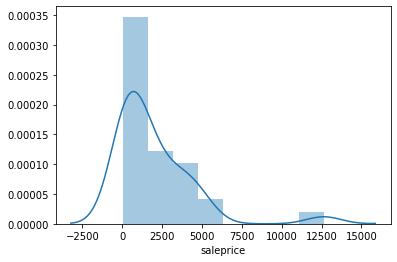

In [16]:
# Show a histogram for each of the 9 variables
sns.distplot(tv['saleprice'])

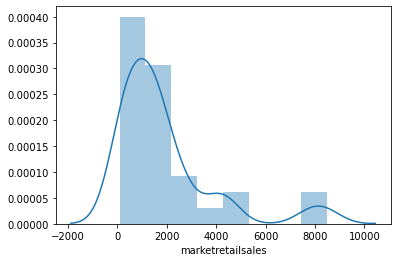

In [17]:
sns.distplot(tv['marketretailsales'])

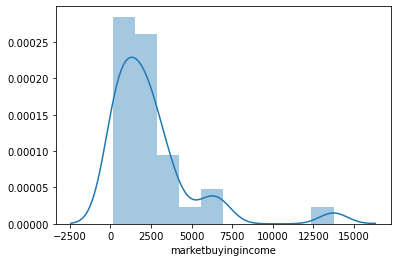

In [18]:
sns.distplot(tv['marketbuyingincome'])

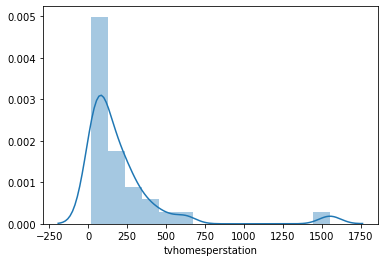

In [19]:
sns.distplot(tv['tvhomesperstation'])

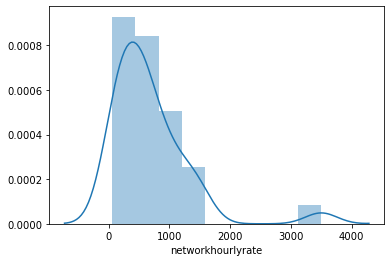

In [20]:
sns.distplot(tv['networkhourlyrate'])

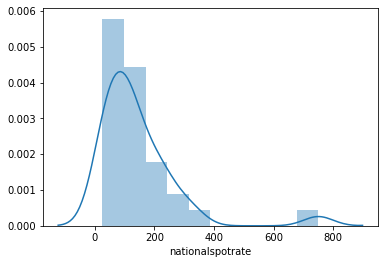

In [21]:
sns.distplot(tv['nationalspotrate'])

C:\Users\lynds\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


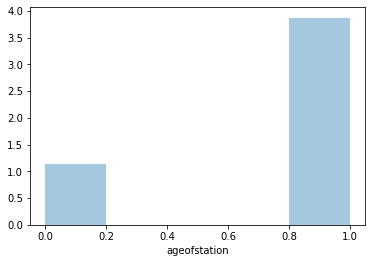

In [22]:
sns.distplot(tv['ageofstation'])

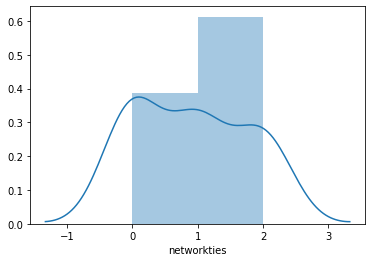

In [23]:
sns.distplot(tv['networkties'])

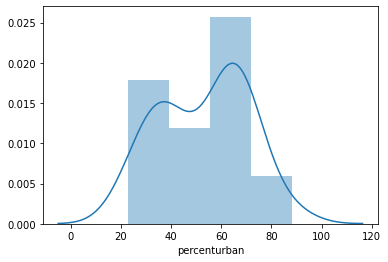

In [24]:
sns.distplot(tv['percenturban'])

In [25]:
# Show a boxplot for each of the 9 variables

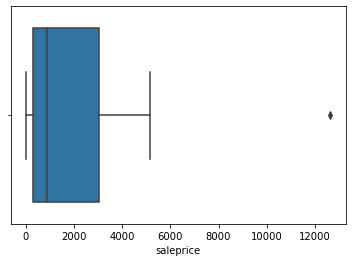

In [26]:
sns.boxplot(tv['saleprice'])

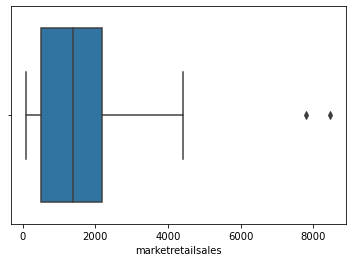

In [27]:
sns.boxplot(tv['marketretailsales'])

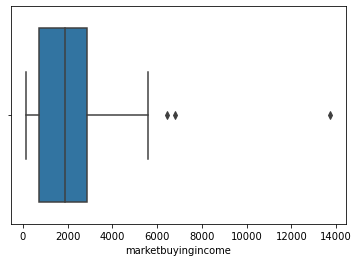

In [28]:
sns.boxplot(tv['marketbuyingincome'])

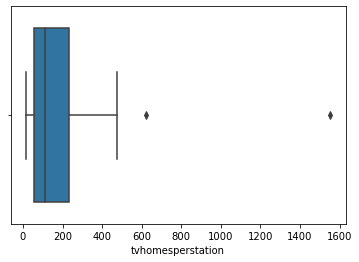

In [29]:
sns.boxplot(tv['tvhomesperstation'])

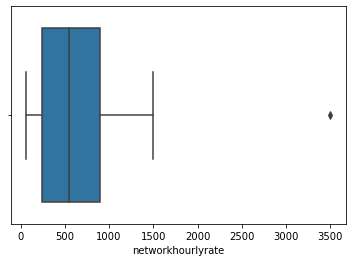

In [30]:
sns.boxplot(tv['networkhourlyrate'])

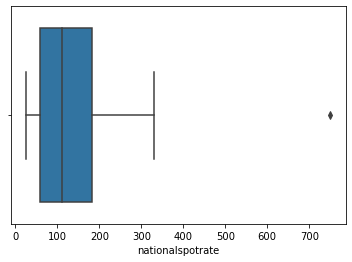

In [31]:
sns.boxplot(tv['nationalspotrate'])

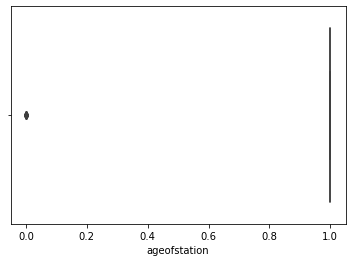

In [32]:
sns.boxplot(tv['ageofstation'])

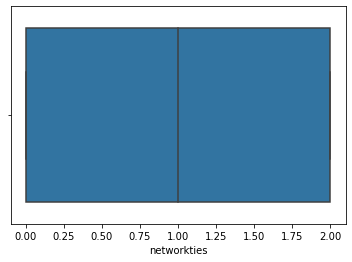

In [33]:
sns.boxplot(tv['networkties'])

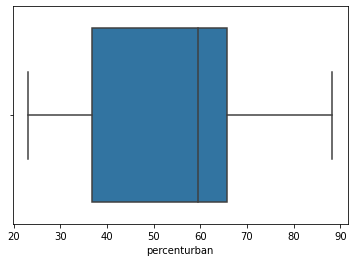

In [34]:
sns.boxplot(tv['percenturban'])

### Data Understanding Summary of Findings:

None of the variables are symmetric.

The following variable is left skewed : ageOfStation

The following variables are right skewed: salePrice, marketRetailSales, marketBuyingIncome, tvHomes, netowrkHourlyRate and nationalSpotRate

None of the variables have one single mode

All of the variables seem to be narrow except ageOfStation

There are not many outliers. marketRetailSales has 2,marketBuyingIncome has 3 and tvHomes also has 2 outliers. 

No, I do not believe that any of the 9 variables are normally distributed. As said above, majority of the variables are right skewed. 




## 4. Data Preparation:

In preparing data for linear regression modeling, we wanted to first assess the impact of the skewed data. 

Due to the identified skewness in Step 3 we will evaluate if transformations can result in a normal distribution

<Figure size 1440x720 with 0 Axes>

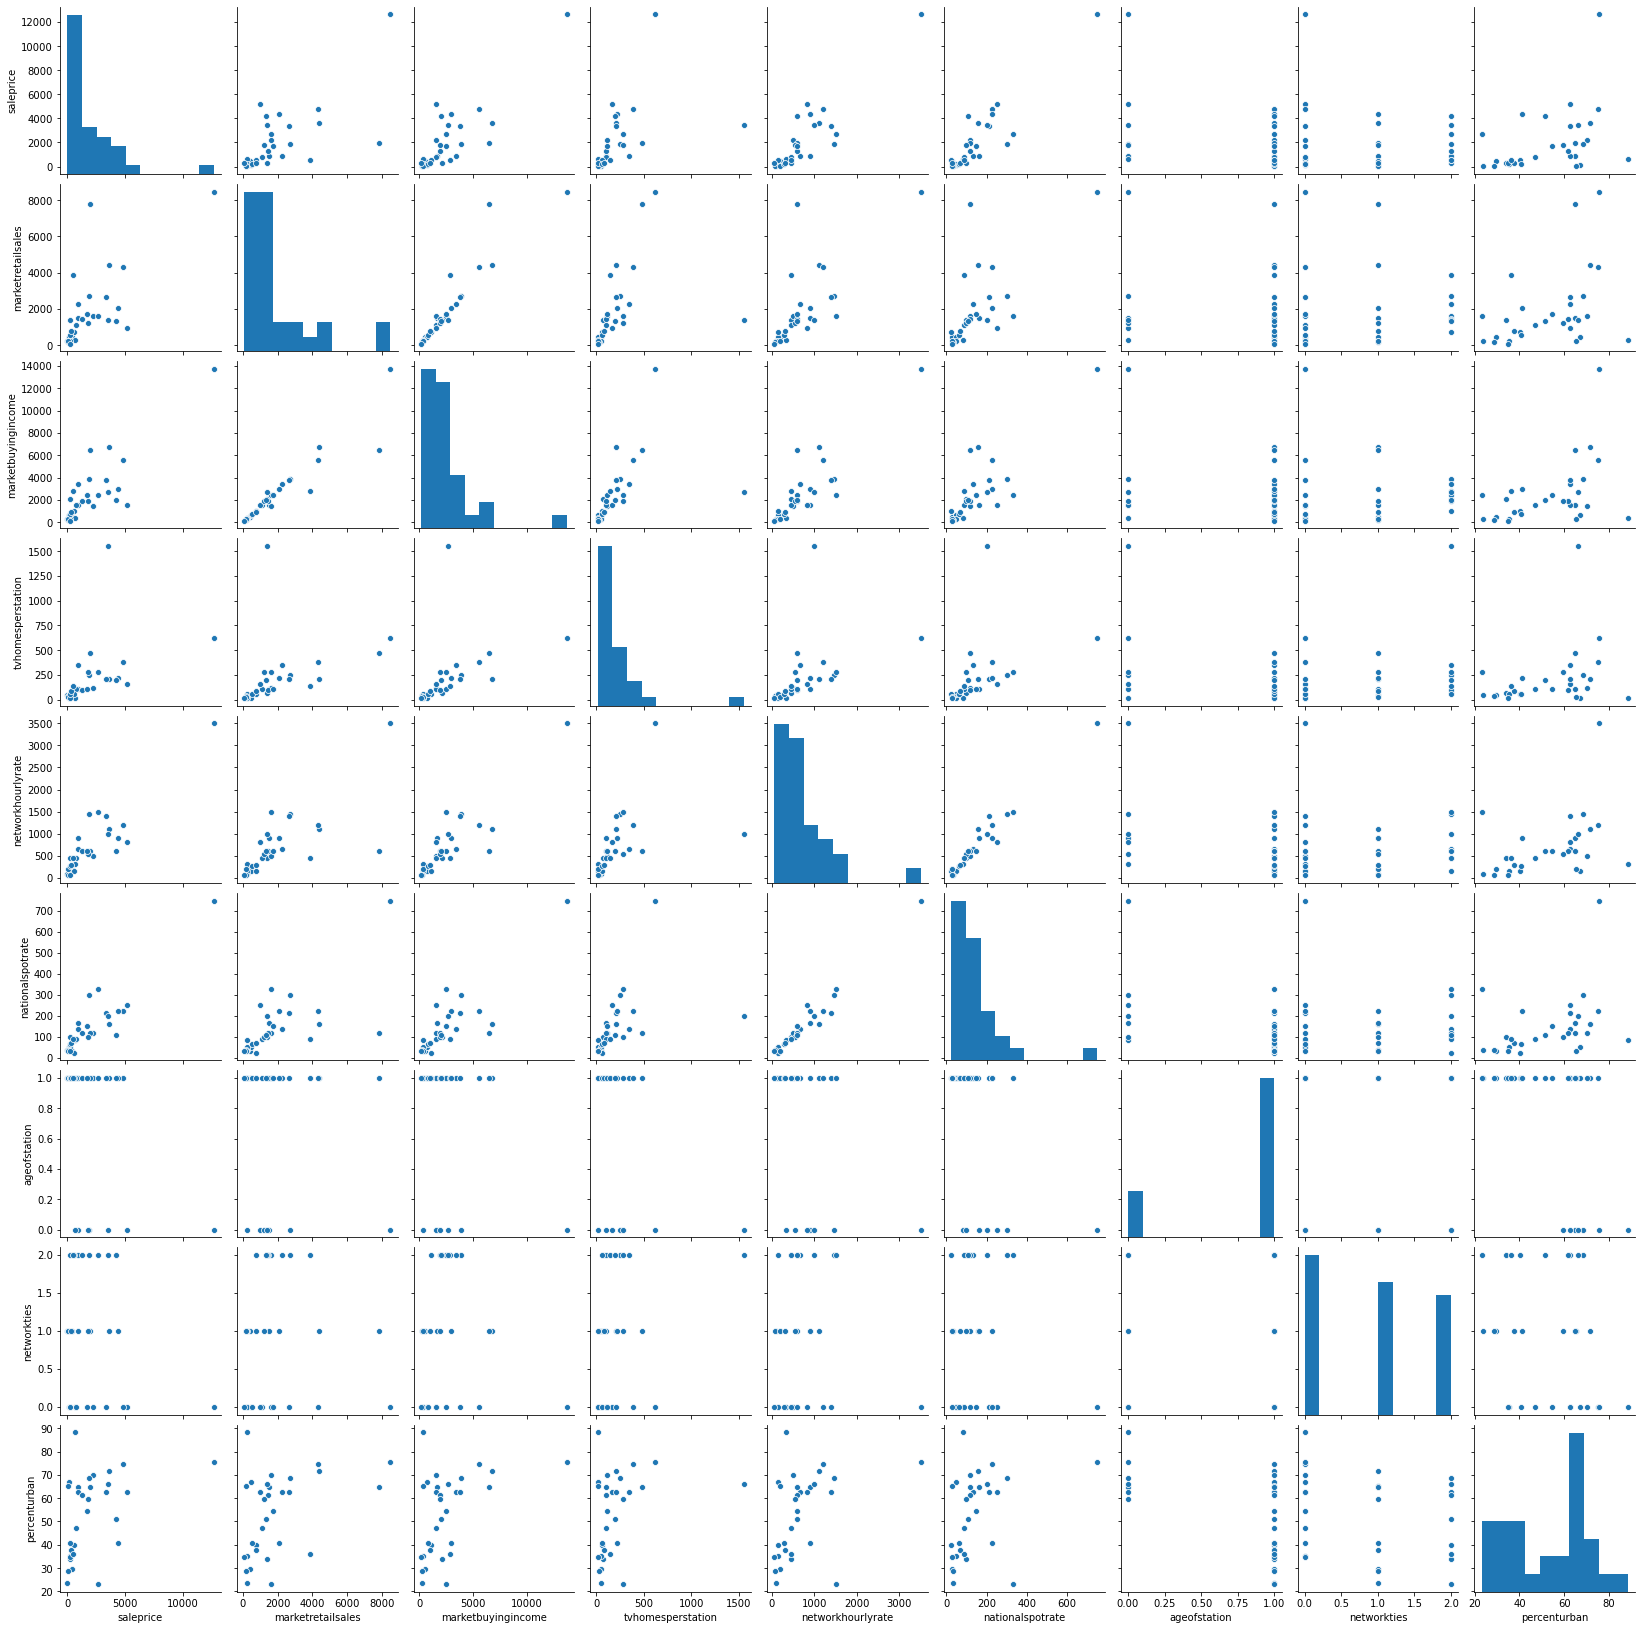

In [35]:
#Perform pairwise plot for all values in the dataset
tv_numeric = tv.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(20,10))
sns.pairplot(tv_numeric)
plt.show()

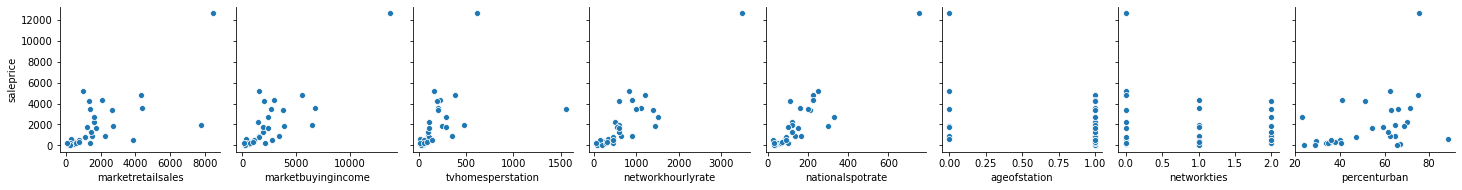

In [36]:
#Perform pairwise scatterplot for each feature versus outcome
sns.pairplot(tv, x_vars=['marketretailsales',\
                         'marketbuyingincome',\
                         'tvhomesperstation',\
                         'networkhourlyrate',\
                         'nationalspotrate',\
                         'ageofstation',\
                         'networkties',\
                         'percenturban'], y_vars='saleprice')

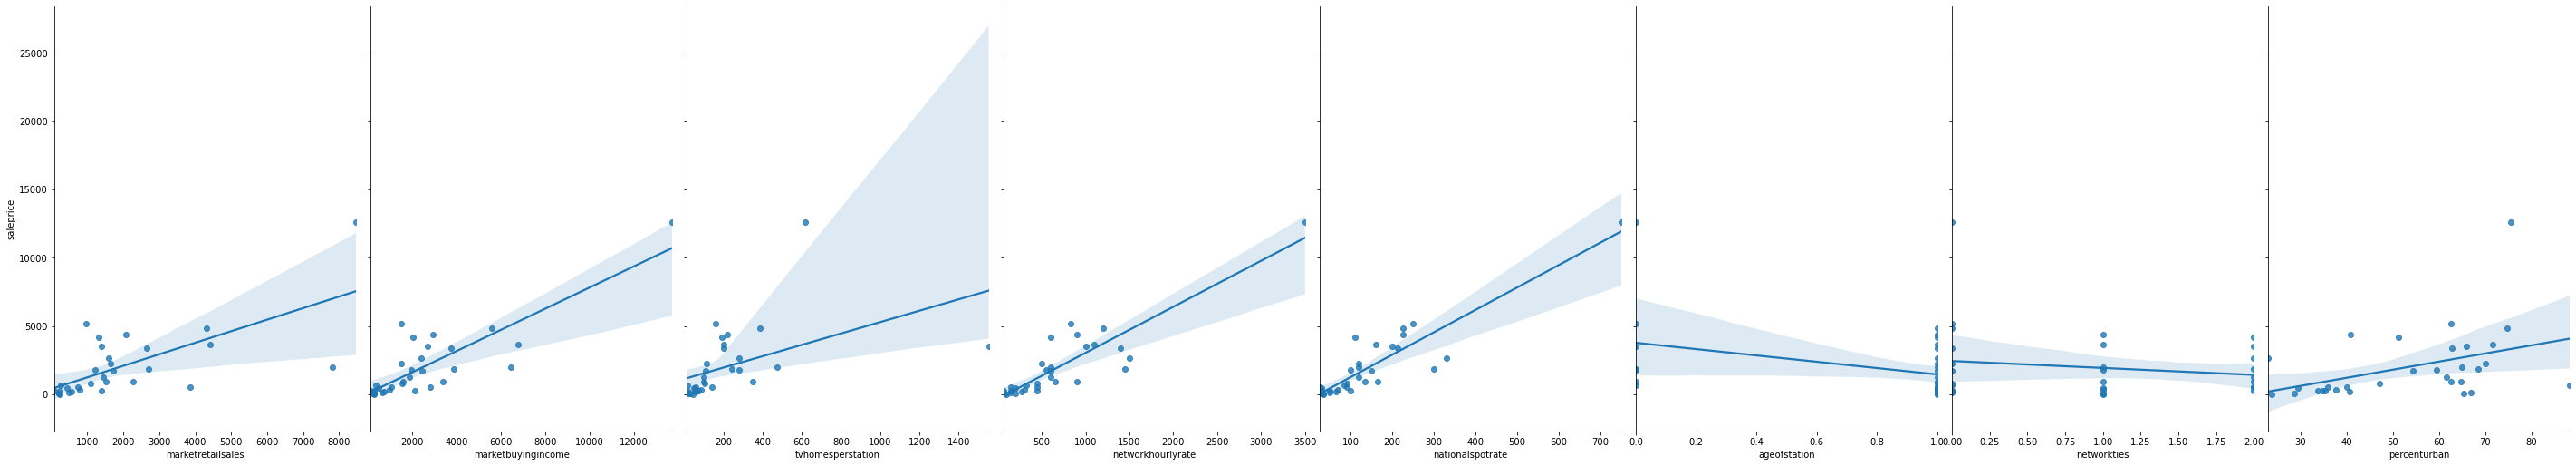

In [37]:
#Plot least squares line for all x (feature) variables
sns.pairplot(tv, x_vars=['marketretailsales',\
                         'marketbuyingincome',\
                         'tvhomesperstation',\
                         'networkhourlyrate',\
                         'nationalspotrate',\
                         'ageofstation',\
                         'networkties',\
                         'percenturban'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

In [38]:
tv.corr(method='pearson')

,saleprice,marketretailsales,marketbuyingincome,tvhomesperstation,networkhourlyrate,nationalspotrate,ageofstation,networkties,percenturban
saleprice,1.000000,0.680701,0.837621,0.475470,0.891867,0.903090,-0.389591,-0.166941,0.412246
marketretailsales,0.680701,1.000000,0.932744,0.398755,0.719377,0.675257,-0.131727,-0.002884,0.404510
marketbuyingincome,0.837621,0.932744,1.000000,0.453852,0.876974,0.835358,-0.242029,-0.038038,0.440697
tvhomesperstation,0.475470,0.398755,0.453852,1.000000,0.470874,0.448982,-0.419035,0.243449,0.305483
networkhourlyrate,0.891867,0.719377,0.876974,0.470874,1.000000,0.979146,-0.440319,-0.031909,0.401877
nationalspotrate,0.903090,0.675257,0.835358,0.448982,0.979146,1.000000,-0.475215,-0.067915,0.356871
ageofstation,-0.389591,-0.131727,-0.242029,-0.419035,-0.440319,-0.475215,1.000000,0.030449,-0.510602
networkties,-0.166941,-0.002884,-0.038038,0.243449,-0.031909,-0.067915,0.030449,1.000000,-0.254780
percenturban,0.412246,0.404510,0.440697,0.305483,0.401877,0.356871,-0.510602,-0.254780,1.000000


### Findings from Correlation Analysis:

Checking the top most part of the correlation table:

For our indepedent variable (y) that is salePrice there is a  positive correlation between these dependent (x) variables: marketRetailSales, marketBuyingIncome, tvHomes, networkHourlyRate, nationalSpotRate and marketPopulationUrbanAreas. This means that as the value of our x's increase, salePrice increase.

Also, there is a negative correlation with ageOfStation and tiesWithMajorNetworks. Although given the low number on tiesWithMajorNetworks, it does not have much impact on salePrice.

### Transformation of data to result in normal distribution

The following steps will assess normality for continuous variable data under different transformation options (Log, Reciprocal, and Square Root):


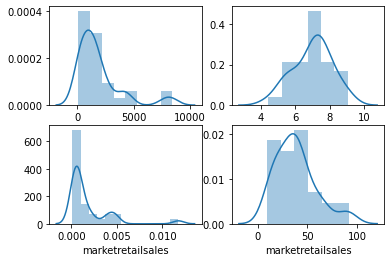

In [39]:
#Market retail sales data transformation
log_marketretailsales = np.log(tv['marketretailsales'])
recip_marketretailsales = 1/(tv['marketretailsales'])
sqrt_marketretailsales = (tv['marketretailsales'])**(0.5)

#histograms to compare transformations
fig, ax = plt.subplots(2,2)
sns.distplot(tv['marketretailsales'],hist=True, kde=True, label='Un-transformed',ax=ax[0,0])
sns.distplot(log_marketretailsales,hist=True, kde=True, label='Log', ax=ax[0,1])
sns.distplot(recip_marketretailsales,hist=True, kde=True, label='Reciprocal', ax=ax[1,0])
sns.distplot(sqrt_marketretailsales,hist=True, kde=True, label='Square Root', ax=ax[1,1])

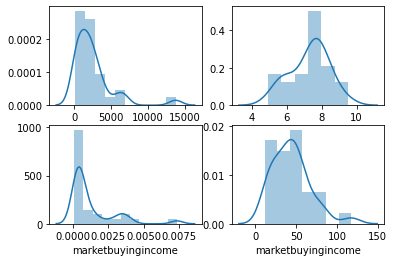

In [40]:
#Market buying income data transformation
log_marketbuyingincome = np.log(tv['marketbuyingincome'])
recip_marketbuyingincome = 1/(tv['marketbuyingincome'])
sqrt_marketbuyingincome = (tv['marketbuyingincome'])**(0.5)

#histograms to compare transformations
fig, ax = plt.subplots(2,2)
sns.distplot(tv['marketbuyingincome'],hist=True, kde=True, label='Un-transformed',ax=ax[0,0])
sns.distplot(log_marketbuyingincome,hist=True, kde=True, label='Log', ax=ax[0,1])
sns.distplot(recip_marketbuyingincome,hist=True, kde=True, label='Reciprocal', ax=ax[1,0])
sns.distplot(sqrt_marketbuyingincome,hist=True, kde=True, label='Square Root', ax=ax[1,1])

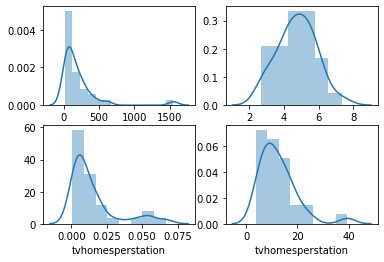

In [41]:
#TV Homes per station
log_tvhomesperstation = np.log(tv['tvhomesperstation'])
recip_tvhomesperstation = 1/(tv['tvhomesperstation'])
sqrt_tvhomesperstation = (tv['tvhomesperstation'])**(0.5)

#histograms to compare transformations
fig, ax = plt.subplots(2,2)
sns.distplot(tv['tvhomesperstation'],hist=True, kde=True, label='Un-transformed',ax=ax[0,0])
sns.distplot(log_tvhomesperstation,hist=True, kde=True, label='Log', ax=ax[0,1])
sns.distplot(recip_tvhomesperstation,hist=True, kde=True, label='Reciprocal', ax=ax[1,0])
sns.distplot(sqrt_tvhomesperstation,hist=True, kde=True, label='Square Root', ax=ax[1,1])

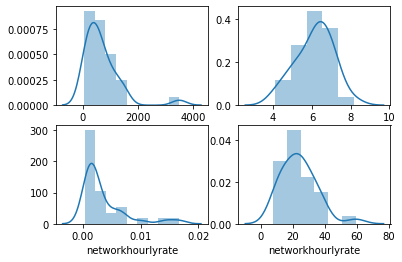

In [42]:
#Network hourly rate
log_networkhourlyrate = np.log(tv['networkhourlyrate'])
recip_networkhourlyrate = 1/(tv['networkhourlyrate'])
sqrt_networkhourlyrate = (tv['networkhourlyrate'])**(0.5)

#histograms to compare transformations
fig, ax = plt.subplots(2,2)
sns.distplot(tv['networkhourlyrate'],hist=True, kde=True, label='Un-transformed',ax=ax[0,0])
sns.distplot(log_networkhourlyrate,hist=True, kde=True, label='Log', ax=ax[0,1])
sns.distplot(recip_networkhourlyrate,hist=True, kde=True, label='Reciprocal', ax=ax[1,0])
sns.distplot(sqrt_networkhourlyrate,hist=True, kde=True, label='Square Root', ax=ax[1,1])

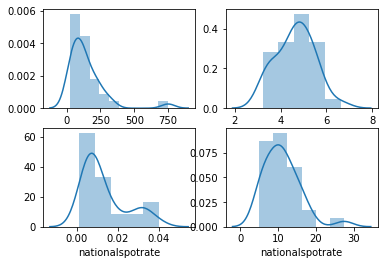

In [43]:
#National spot rate
log_nationalspotrate = np.log(tv['nationalspotrate'])
recip_nationalspotrate = 1/(tv['nationalspotrate'])
sqrt_nationalspotrate = (tv['nationalspotrate'])**(0.5)

#histograms to compare transformations
fig, ax = plt.subplots(2,2)
sns.distplot(tv['nationalspotrate'],hist=True, kde=True, label='Un-transformed',ax=ax[0,0])
sns.distplot(log_nationalspotrate,hist=True, kde=True, label='Log', ax=ax[0,1])
sns.distplot(recip_nationalspotrate,hist=True, kde=True, label='Reciprocal', ax=ax[1,0])
sns.distplot(sqrt_nationalspotrate,hist=True, kde=True, label='Square Root', ax=ax[1,1])

### Based on the analysis above, it appears that the log transformation is effective in providing a normal distribution for:

    -Market Retail Sales
    -Market Buying Income 
    -TV Homes per Station
    -Network Hourly Rate
    -National Spot Rate


In [44]:
#add log transformed variables to TV dataframe
tv['log_marketretailsales'] = np.log(tv['marketretailsales'])
tv['log_marketbuyingincome'] = np.log(tv['marketbuyingincome'])
tv['log_tvhomesperstation'] = np.log(tv['tvhomesperstation'])
tv['log_networkhourlyrate'] = np.log(tv['networkhourlyrate'])
tv['log_nationalspotrate'] = np.log(tv['nationalspotrate'])

In [45]:
tv.head()

,station,saleprice,marketretailsales,marketbuyingincome,tvhomesperstation,networkhourlyrate,nationalspotrate,ageofstation,networkties,percenturban,log_marketretailsales,log_marketbuyingincome,log_tvhomesperstation,log_networkhourlyrate,log_nationalspotrate
0,WNHC,3620,4406,6782,204,1100,160,1,1,71.6,8.390723,8.822027,5.318120,7.003065,5.075174
1,WHTN,257,1389,2133,71,450,100,1,2,33.8,7.236339,7.665285,4.262680,6.109248,4.605170
2,WHAM,900,1523,1588,103,900,165,0,1,64.8,7.328437,7.370231,4.634729,6.802395,5.105945
3,WTVT,2246,1636,1493,113,500,120,1,0,70.0,7.400010,7.308543,4.727388,6.214608,4.787492
4,WSVA,449,428,511,51,200,30,1,1,29.5,6.059123,6.236370,3.931826,5.298317,3.401197


<Figure size 1440x720 with 0 Axes>

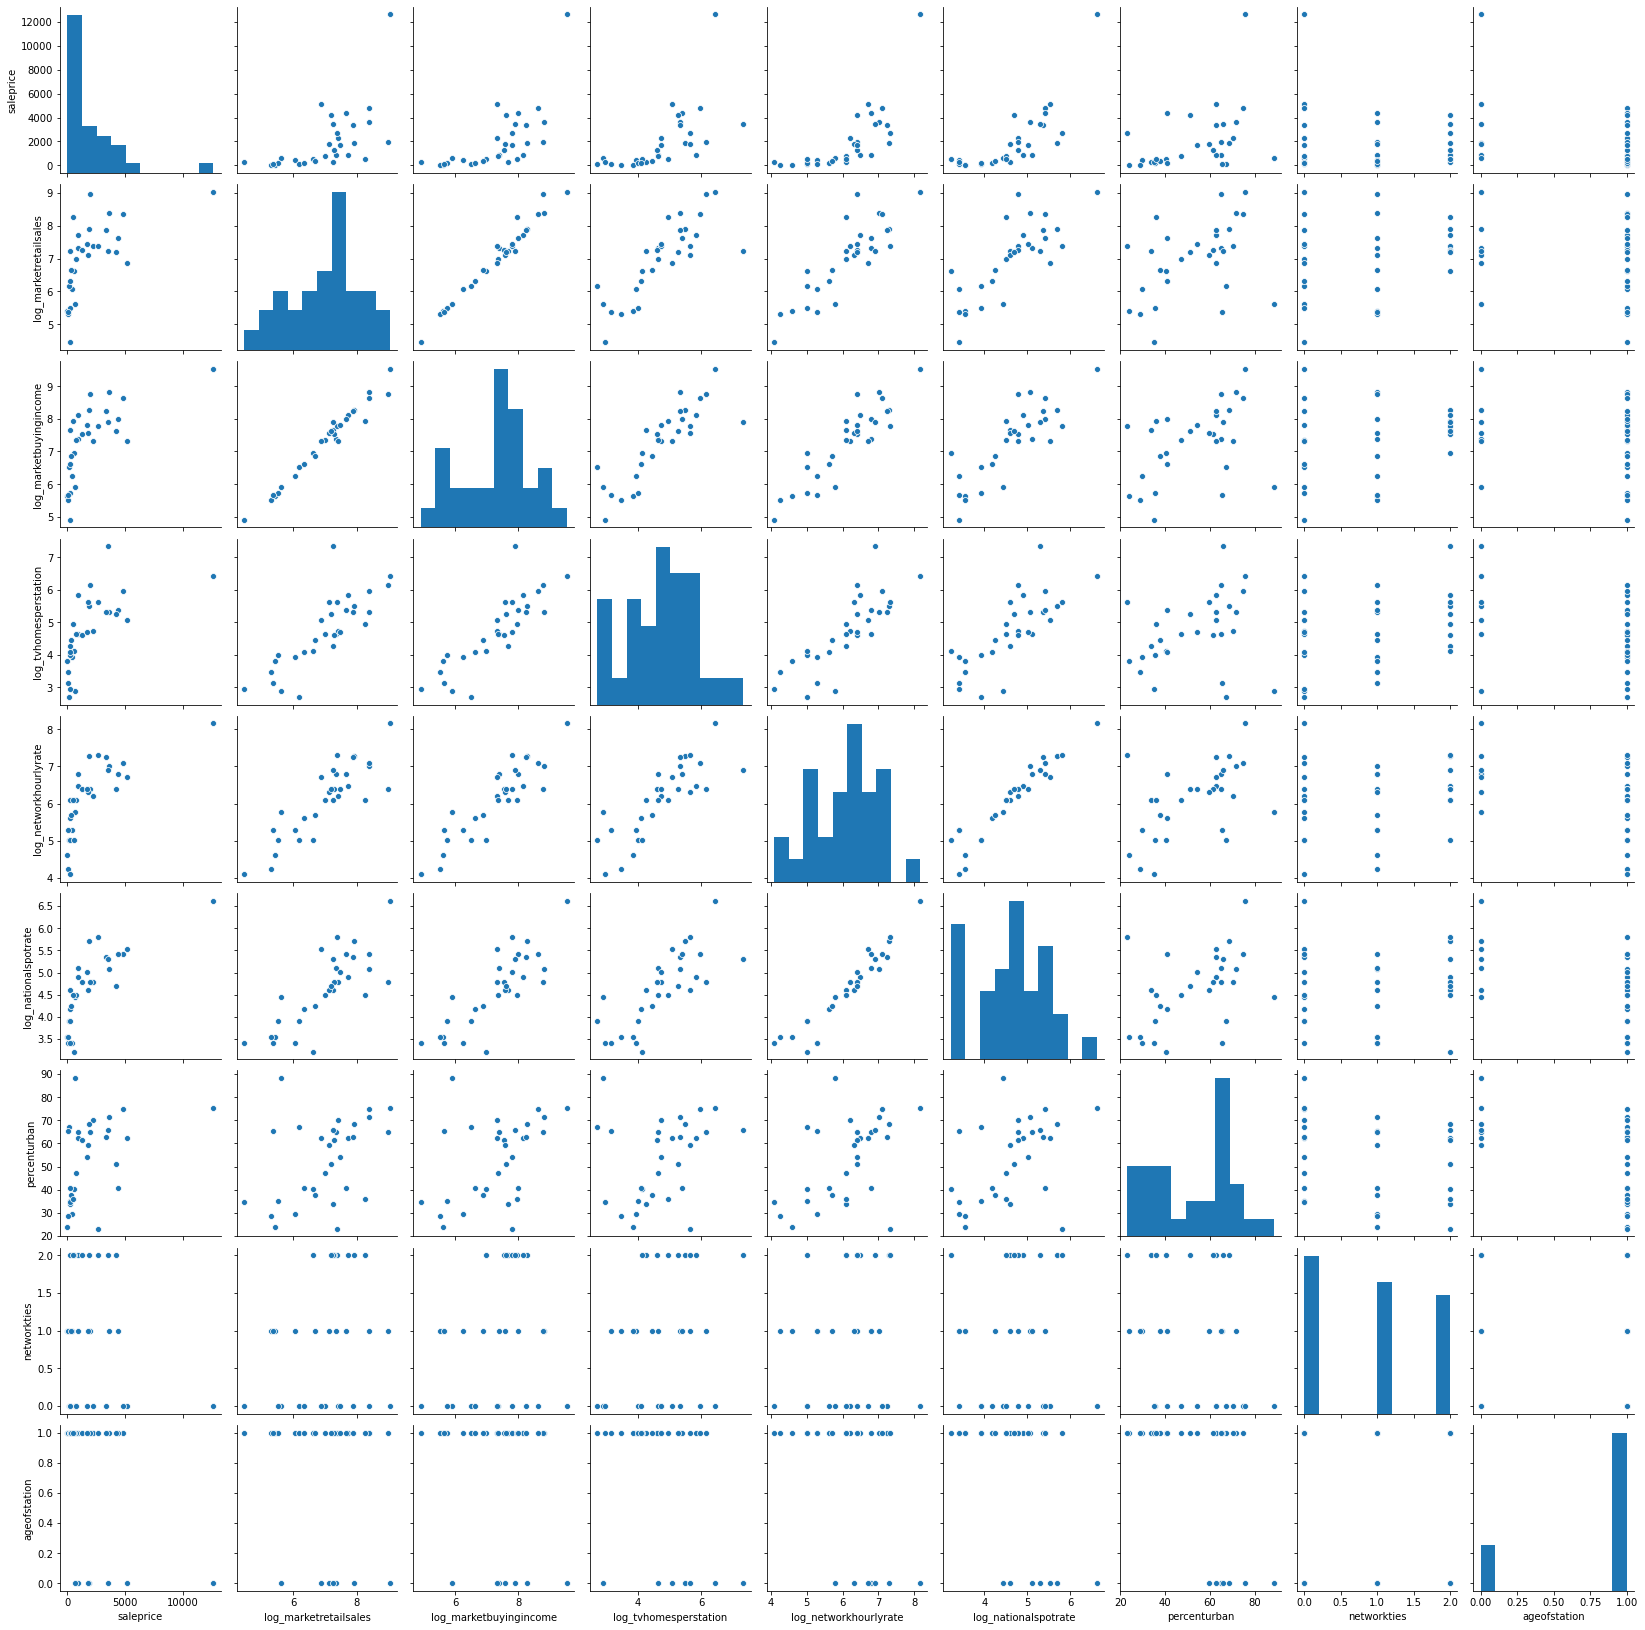

In [46]:
#view pairwise scatterplot for log transformed variables
tv_log = tv[['saleprice',\
             'log_marketretailsales',\
             'log_marketbuyingincome',\
            'log_tvhomesperstation',\
            'log_networkhourlyrate',\
            'log_nationalspotrate',\
            'percenturban',\
            'networkties',\
            'ageofstation']]
plt.figure(figsize=(20,10))
sns.pairplot(tv_log)
plt.show()

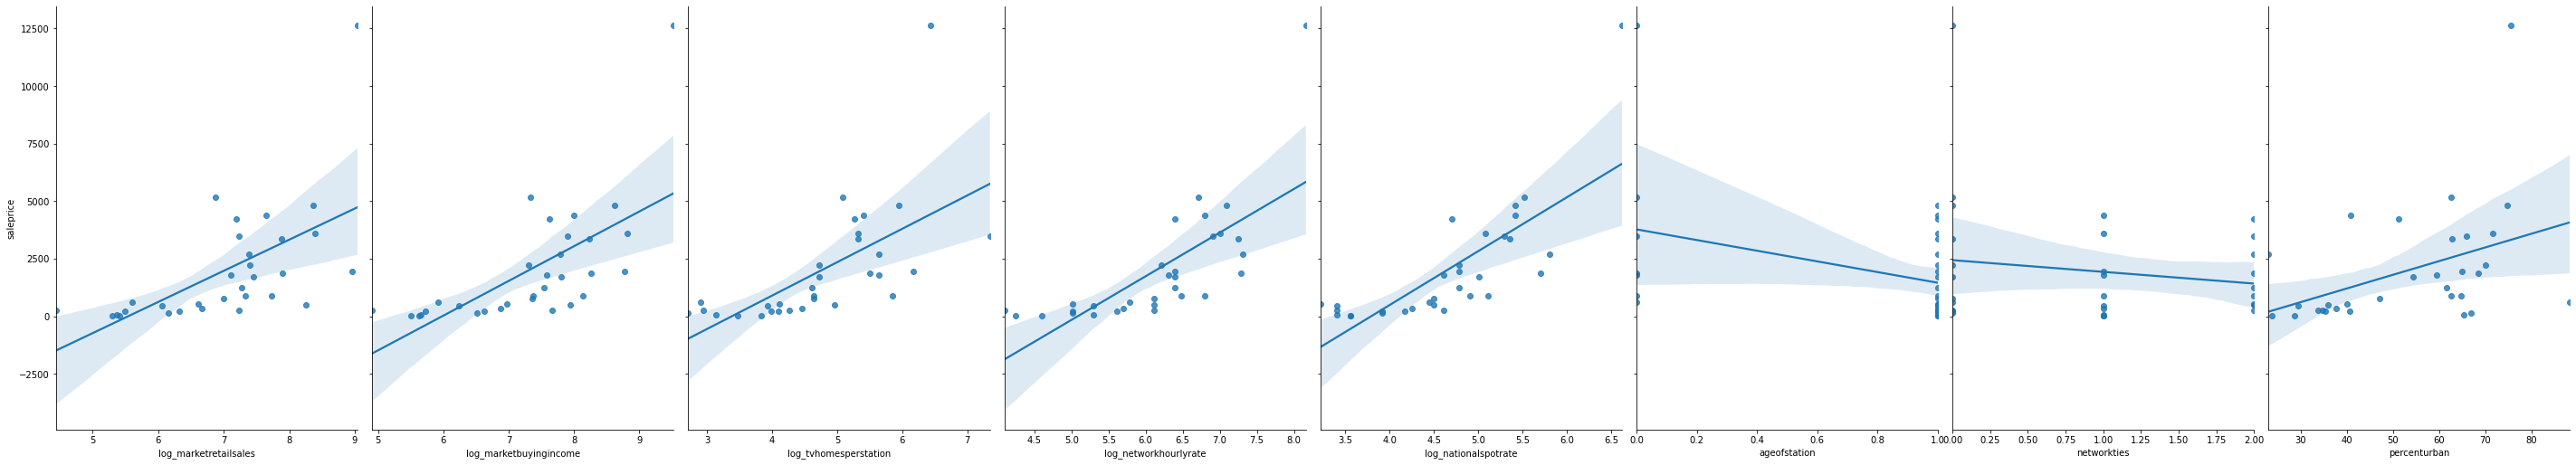

In [47]:
#Plot least squares line for all x (feature) variables with log transformations
sns.pairplot(tv, x_vars=['log_marketretailsales',\
                         'log_marketbuyingincome',\
                         'log_tvhomesperstation',\
                         'log_networkhourlyrate',\
                         'log_nationalspotrate',\
                         'ageofstation',\
                         'networkties',\
                         'percenturban'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

In [48]:
tv.corr(method='pearson')

,saleprice,marketretailsales,marketbuyingincome,tvhomesperstation,networkhourlyrate,nationalspotrate,ageofstation,networkties,percenturban,log_marketretailsales,log_marketbuyingincome,log_tvhomesperstation,log_networkhourlyrate,log_nationalspotrate
saleprice,1.000000,0.680701,0.837621,0.475470,0.891867,0.903090,-0.389591,-0.166941,0.412246,0.601263,0.662564,0.630051,0.720916,0.764349
marketretailsales,0.680701,1.000000,0.932744,0.398755,0.719377,0.675257,-0.131727,-0.002884,0.404510,0.832246,0.801096,0.644956,0.645100,0.624670
marketbuyingincome,0.837621,0.932744,1.000000,0.453852,0.876974,0.835358,-0.242029,-0.038038,0.440697,0.787617,0.810457,0.664096,0.722086,0.715286
tvhomesperstation,0.475470,0.398755,0.453852,1.000000,0.470874,0.448982,-0.419035,0.243449,0.305483,0.430286,0.492562,0.777440,0.498787,0.497225
networkhourlyrate,0.891867,0.719377,0.876974,0.470874,1.000000,0.979146,-0.440319,-0.031909,0.401877,0.681779,0.737111,0.659548,0.833574,0.856679
nationalspotrate,0.903090,0.675257,0.835358,0.448982,0.979146,1.000000,-0.475215,-0.067915,0.356871,0.620759,0.676952,0.618591,0.788802,0.855087
ageofstation,-0.389591,-0.131727,-0.242029,-0.419035,-0.440319,-0.475215,1.000000,0.030449,-0.510602,-0.144619,-0.198556,-0.309095,-0.413574,-0.459595
networkties,-0.166941,-0.002884,-0.038038,0.243449,-0.031909,-0.067915,0.030449,1.000000,-0.254780,0.206058,0.210426,0.301774,0.122234,0.018088
percenturban,0.412246,0.404510,0.440697,0.305483,0.401877,0.356871,-0.510602,-0.254780,1.000000,0.414521,0.436738,0.276290,0.512392,0.468047
log_marketretailsales,0.601263,0.832246,0.787617,0.430286,0.681779,0.620759,-0.144619,0.206058,0.414521,1.000000,0.983729,0.810747,0.860513,0.785855


### Findings from Correlation Analysis #2:

Checking the log transformed variables from the correlation table:

For our indepedent variable (y) that is salePrice there is a  positive correlation between these dependent (x) variables: log_marketRetailSales, log_marketBuyingIncome, log_tvHomesperstation, log_networkHourlyRate, log_nationalSpotRate. This means that as the value of our log_x's increase, salePrice increase.

Compared to the un-transformed versions of these dependent (x) variables, the correlation correficient generally decreased.


## 5. Modeling

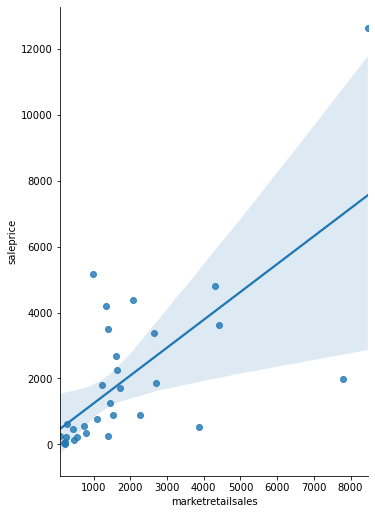

In [50]:
#plotting the least squares line (un-transformed Independent variable)

sns.pairplot(tv, x_vars=['marketretailsales'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

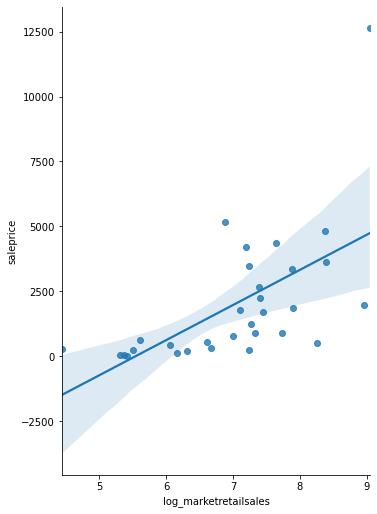

In [69]:
#plotting the least squares line (log-transformed independent variable)

sns.pairplot(tv, x_vars=['log_marketretailsales'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

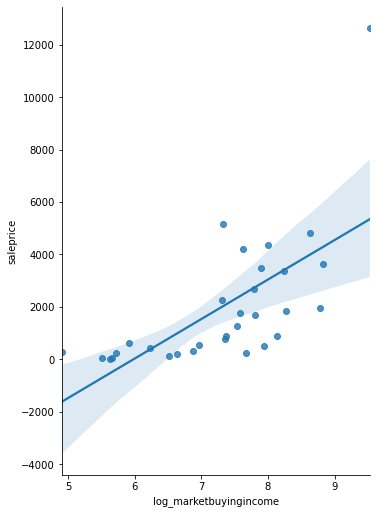

In [70]:
#plotting the least squares line

sns.pairplot(tv, x_vars=['log_marketbuyingincome'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

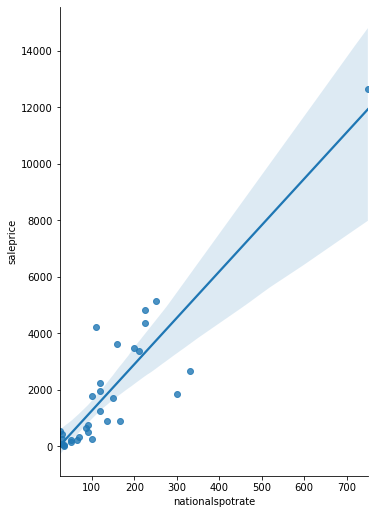

In [73]:
#plotting the least squares line (log-transformed independent variable)

sns.pairplot(tv, x_vars=['nationalspotrate'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

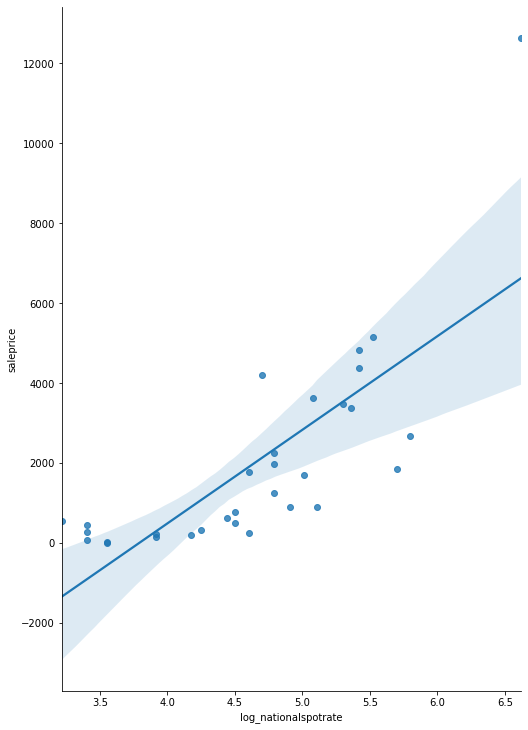

In [80]:
#plotting the least squares line (log-transformed independent variable)

sns.pairplot(tv, x_vars=['log_nationalspotrate'], y_vars='saleprice', height=7, aspect=0.7, kind='reg')

### Univariate Regression models

In [82]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='saleprice ~ log_networkhourlyrate', data=tv).fit()

# print the coefficients
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     31.38
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.77e-06
Time:                        22:00:13   Log-Likelihood:                -275.04
No. Observations:                  31   AIC:                             554.1
Df Residuals:                      29   BIC:                             556.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -9632.7201   2097.916     -4.592      0.000   -1.39e+04   -5342.001
log_networkhourlyrate  1895.8322    338.426      5.602      0.000    1203.674    2587.990
==============================================================================
Omnibus:                       26.337   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.403
Skew:                           1.862   Prob(JB):                     1.54e-12
Kurtosis:                       8.316   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
### STATSMODELS ###

# create a fitted model
lm2 = smf.ols(formula='saleprice ~ log_nationalspotrate', data=tv).fit()

# print the coefficients
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     40.75
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           5.59e-07
Time:                        22:00:14   Log-Likelihood:                -272.80
No. Observations:                  31   AIC:                             549.6
Df Residuals:                      29   BIC:                             552.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8868.7872   1725.707     -5.139      0.000   -1.24e+04   -5339.320
log_nationalspotrate  2340.3672    366.624      6.384      0.000    1590.537    3090.197
==============================================================================
Omnibus:                       19.927   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.449
Skew:                           1.466   Prob(JB):                     8.99e-08
Kurtosis:                       7.065   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X2_client1 = pd.DataFrame({'log_nationalspotrate': [2.1760912590556812]})
X2_client2 = pd.DataFrame({'log_nationalspotrate': [2.3979400086720376]})

# predict for a new observation
print(lm2.predict(X2_client1))
print(lm2.predict(X2_client2))

0   -3775.934675
dtype: float64
0   -3256.727147
dtype: float64


In [85]:
# manually calculate the prediction (CLIENT 1)
# 𝑦=𝛽0+𝛽1𝑥
-8868.7872 + 2340.3672*2.1760912590556812

-3775.9345930993804

In [86]:
# manually calculate the prediction (CLIENT 2)
# 𝑦=𝛽0+𝛽1𝑥
-8868.7872 + 2340.3672*2.3979400086720376

-3256.7270561362484

In [87]:
import math

In [88]:
### STATSMODELS ###

# create a fitted model
lm3 = smf.ols(formula='saleprice ~ log_marketbuyingincome', data=tv).fit()

# print the coefficients
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     22.69
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.89e-05
Time:                        22:00:15   Log-Likelihood:                -277.44
No. Observations:                  31   AIC:                             558.9
Df Residuals:                      29   BIC:                             561.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9016.0947   2334.521     -3.862      0.001   -1.38e+04   -4241.463
log_marketbuyingincome  1507.6512    316.490      4.764      0.000     860.357    2154.945
==============================================================================
Omnibus:                       25.903   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.433
Skew:                           1.838   Prob(JB):                     4.11e-12
Kurtosis:                       8.203   Cond. No.                         50.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
### STATSMODELS ###

# create a fitted model
lm4 = smf.ols(formula='saleprice ~ log_tvhomesperstation', data=tv).fit()

# print the coefficients
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     19.09
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           0.000146
Time:                        22:00:15   Log-Likelihood:                -278.56
No. Observations:                  31   AIC:                             561.1
Df Residuals:                      29   BIC:                             564.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4888.2418   1612.833     -3.031      0.005   -8186.855   -1589.629
log_tvhomesperstation  1448.3920    331.500      4.369      0.000     770.399    2126.385
==============================================================================
Omnibus:                       35.315   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.772
Skew:                           2.354   Prob(JB):                     1.46e-24
Kurtosis:                      10.925   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
### STATSMODELS ###

# create a fitted model
lm5 = smf.ols(formula='saleprice ~ log_marketretailsales', data=tv).fit()

# print the coefficients
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     16.42
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           0.000347
Time:                        22:00:16   Log-Likelihood:                -279.45
No. Observations:                  31   AIC:                             562.9
Df Residuals:                      29   BIC:                             565.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -7489.4627   2366.330     -3.165      0.004   -1.23e+04   -2649.774
log_marketretailsales  1352.5313    333.779      4.052      0.000     669.877    2035.185
==============================================================================
Omnibus:                       27.572   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.290
Skew:                           1.914   Prob(JB):                     4.91e-14
Kurtosis:                       8.728   Cond. No.                         46.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
### STATSMODELS ###

# create a fitted model
lm6 = smf.ols(formula='saleprice ~ percenturban', data=tv).fit()

# print the coefficients
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     5.938
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0212
Time:                        22:00:16   Log-Likelihood:                -283.52
No. Observations:                  31   AIC:                             571.0
Df Residuals:                      29   BIC:                             573.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1172.3016   1361.207     -0.861      0.396   -3956.283    1611.680
percenturban    59.5399     24.435      2.437      0.021       9.565     109.514
==============================================================================
Omnibus:                       32.045   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.009
Skew:                           2.191   Prob(JB):                     5.72e-19
Kurtosis:                       9.770   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
### STATSMODELS ###

# create a fitted model
lm7 = smf.ols(formula='saleprice ~ ageofstation', data=tv).fit()

# print the coefficients
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     5.189
Date:                Fri, 13 Nov 2020   Prob (F-statistic):             0.0303
Time:                        22:00:16   Log-Likelihood:                -283.85
No. Observations:                  31   AIC:                             571.7
Df Residuals:                      29   BIC:                             574.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3777.7143    896.011      4.216      0.000    1945.167    5610.262
ageofstation -2319.7560   1018.330     -2.278      0.030   -4402.474    -237.038
==============================================================================
Omnibus:                       25.735   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.188
Skew:                           1.894   Prob(JB):                     3.44e-11
Kurtosis:                       7.791   Cond. No.                         3.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
### STATSMODELS ###

# create a fitted model
lm8 = smf.ols(formula='saleprice ~ networkties', data=tv).fit()

# print the coefficients
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8314
Date:                Fri, 13 Nov 2020   Prob (F-statistic):              0.369
Time:                        22:00:16   Log-Likelihood:                -285.96
No. Observations:                  31   AIC:                             575.9
Df Residuals:                      29   BIC:                             578.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2441.0561    679.332      3.593      0.001    1051.666    3830.446
networkties  -508.4907    557.679     -0.912      0.369   -1649.071     632.090
==============================================================================
Omnibus:                       33.450   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.576
Skew:                           2.307   Prob(JB):                     3.54e-20
Kurtosis:                       9.932   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
### STATSMODELS ###

# create a fitted model
lm9 = smf.ols(formula='saleprice ~ nationalspotrate', data=tv).fit()

# print the coefficients
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.65e-12
Time:                        22:00:16   Log-Likelihood:                -260.20
No. Observations:                  31   AIC:                             524.4
Df Residuals:                      29   BIC:                             527.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -378.4670    287.848     -1.315      0.199    -967.182     210.247
nationalspotrate    16.4163      1.450     11.324      0.000      13.451      19.381
==============================================================================
Omnibus:                        2.732   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                1.566
Skew:                          -0.135   Prob(JB):                        0.457
Kurtosis:                       4.067   Cond. No.                         288.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_client1 = pd.DataFrame({'nationalspotrate': [150]})
X_client2 = pd.DataFrame({'nationalspotrate': [250]})

# predict for a new observation
print(lm9.predict(X_client1))
print(lm9.predict(X_client2))

0    2083.978941
dtype: float64
0    3725.609598
dtype: float64


In [96]:
# manually calculate the prediction (CLIENT 1)
# 𝑦=𝛽0+𝛽1𝑥
-378.4670 + 16.4163*150

2083.978

In [97]:
# manually calculate the prediction (CLIENT 2)
# 𝑦=𝛽0+𝛽1𝑥
-378.4670 + 16.4163*250

3725.6079999999997

In [98]:
### STATSMODELS ###

# create a fitted model
lm10 = smf.ols(formula='saleprice ~ networkhourlyrate', data=tv).fit()

# print the coefficients
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     112.8
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.66e-11
Time:                        22:00:17   Log-Likelihood:                -261.81
No. Observations:                  31   AIC:                             527.6
Df Residuals:                      29   BIC:                             530.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -322.4922    301.349     -1.070      0.293    -938.820     293.836
networkhourlyrate     3.3687      0.317     10.619      0.000       2.720       4.017
==============================================================================
Omnibus:                        2.097   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                0.952
Skew:                           0.141   Prob(JB):                        0.621
Kurtosis:                       3.811   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
### STATSMODELS ###

# create a fitted model
lm11 = smf.ols(formula='saleprice ~ marketbuyingincome', data=tv).fit()

# print the coefficients
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     68.19
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.19e-09
Time:                        22:00:17   Log-Likelihood:                -267.66
No. Observations:                  31   AIC:                             539.3
Df Residuals:                      29   BIC:                             542.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.7792    343.354      0.177      0.861    -641.459     763.017
marketbuyingincome     0.7765      0.094      8.258      0.000       0.584       0.969
==============================================================================
Omnibus:                        4.961   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.425
Skew:                           0.572   Prob(JB):                        0.180
Kurtosis:                       4.158   Cond. No.                     4.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
### STATSMODELS ###

# create a fitted model
lm12 = smf.ols(formula='saleprice ~ tvhomesperstation', data=tv).fit()

# print the coefficients
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     8.471
Date:                Fri, 13 Nov 2020   Prob (F-statistic):            0.00687
Time:                        22:00:17   Log-Likelihood:                -282.43
No. Observations:                  31   AIC:                             568.9
Df Residuals:                      29   BIC:                             571.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1122.4013    502.582      2.233      0.033      94.506    2150.297
tvhomesperstation     4.1691      1.432      2.911      0.007       1.239       7.099
==============================================================================
Omnibus:                       31.341   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.696
Skew:                           2.140   Prob(JB):                     3.00e-18
Kurtosis:                       9.645   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
### STATSMODELS ###

# create a fitted model
lm13 = smf.ols(formula='saleprice ~ marketretailsales', data=tv).fit()

# print the coefficients
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     25.04
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           2.51e-05
Time:                        22:00:18   Log-Likelihood:                -276.76
No. Observations:                  31   AIC:                             557.5
Df Residuals:                      29   BIC:                             560.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           397.3656    463.628      0.857      0.398    -550.860    1345.591
marketretailsales     0.8457      0.169      5.004      0.000       0.500       1.191
==============================================================================
Omnibus:                        5.956   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.152
Skew:                           0.343   Prob(JB):                       0.0461
Kurtosis:                       5.072   Cond. No.                     3.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression Models

In [102]:
### STATSMODELS ###

# create a fitted model
mlm1 = smf.ols(formula='saleprice ~ log_nationalspotrate + log_networkhourlyrate', data=tv).fit()

# print the coefficients
mlm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     19.70
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.57e-06
Time:                        22:00:18   Log-Likelihood:                -272.79
No. Observations:                  31   AIC:                             551.6
Df Residuals:                      28   BIC:                             555.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8726.2433   2032.639     -4.293      0.000   -1.29e+04   -4562.570
log_nationalspotrate   2498.4386   1195.621      2.090      0.046      49.320    4947.557
log_networkhourlyrate  -142.8922   1026.871     -0.139      0.890   -2246.343    1960.559
==============================================================================
Omnibus:                       19.709   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.586
Skew:                           1.459   Prob(JB):                     1.38e-07
Kurtosis:                       6.992   Cond. No.                         56.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
### STATSMODELS ###

# create a fitted model
mlm2 = smf.ols(formula='saleprice ~ log_nationalspotrate + log_marketbuyingincome', data=tv).fit()

# print the coefficients
mlm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     19.87
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.26e-06
Time:                        22:00:19   Log-Likelihood:                -272.71
No. Observations:                  31   AIC:                             551.4
Df Residuals:                      28   BIC:                             555.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -9290.4022   2041.282     -4.551      0.000   -1.35e+04   -5109.026
log_nationalspotrate    2116.6795    669.384      3.162      0.004     745.508    3487.851
log_marketbuyingincome   199.9657    497.458      0.402      0.691    -819.031    1218.962
==============================================================================
Omnibus:                       20.069   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.775
Skew:                           1.477   Prob(JB):                     7.64e-08
Kurtosis:                       7.080   Cond. No.                         59.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
### STATSMODELS ###

# create a fitted model
mlm3 = smf.ols(formula='saleprice ~ log_nationalspotrate + log_tvhomesperstation', data=tv).fit()

# print the coefficients
mlm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     20.00
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.03e-06
Time:                        22:00:19   Log-Likelihood:                -272.65
No. Observations:                  31   AIC:                             551.3
Df Residuals:                      28   BIC:                             555.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8863.9571   1747.765     -5.072      0.000   -1.24e+04   -5283.823
log_nationalspotrate   2104.9221    583.625      3.607      0.001     909.421    3300.423
log_tvhomesperstation   229.1186    438.179      0.523      0.605    -668.450    1126.687
==============================================================================
Omnibus:                       21.739   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.481
Skew:                           1.565   Prob(JB):                     4.41e-09
Kurtosis:                       7.471   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
### STATSMODELS ###

# create a fitted model
mlm4 = smf.ols(formula='saleprice ~ log_nationalspotrate + log_marketretailsales', data=tv).fit()

# print the coefficients
mlm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     19.67
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.61e-06
Time:                        22:00:19   Log-Likelihood:                -272.80
No. Observations:                  31   AIC:                             551.6
Df Residuals:                      28   BIC:                             555.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -8875.9453   1976.035     -4.492      0.000   -1.29e+04   -4828.220
log_nationalspotrate   2336.6199    603.342      3.873      0.001    1100.730    3572.510
log_marketretailsales     3.5032    443.255      0.008      0.994    -904.464     911.470
==============================================================================
Omnibus:                       19.930   Durbin-Watson:                   1.538
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.455
Skew:                           1.467   Prob(JB):                     8.96e-08
Kurtosis:                       7.065   Cond. No.                         56.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
### STATSMODELS ###

# create a fitted model
mlm5 = smf.ols(formula='saleprice ~ log_nationalspotrate + percenturban', data=tv).fit()

# print the coefficients
mlm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     19.98
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.06e-06
Time:                        22:00:20   Log-Likelihood:                -272.66
No. Observations:                  31   AIC:                             551.3
Df Residuals:                      28   BIC:                             555.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8939.0330   1753.655     -5.097      0.000   -1.25e+04   -5346.834
log_nationalspotrate  2240.3614    420.280      5.331      0.000    1379.456    3101.266
percenturban            10.0785     19.824      0.508      0.615     -30.530      50.687
==============================================================================
Omnibus:                       20.128   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.778
Skew:                           1.485   Prob(JB):                     7.63e-08
Kurtosis:                       7.069   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
### STATSMODELS ###

# create a fitted model
mlm6 = smf.ols(formula='saleprice ~ log_nationalspotrate + ageofstation', data=tv).fit()

# print the coefficients
mlm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     19.82
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.33e-06
Time:                        22:00:20   Log-Likelihood:                -272.73
No. Observations:                  31   AIC:                             551.5
Df Residuals:                      28   BIC:                             555.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8328.1492   2322.490     -3.586      0.001   -1.31e+04   -3570.745
log_nationalspotrate  2272.0362    419.171      5.420      0.000    1413.403    3130.670
ageofstation          -289.1235    815.140     -0.355      0.725   -1958.863    1380.616
==============================================================================
Omnibus:                       18.594   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.860
Skew:                           1.382   Prob(JB):                     5.41e-07
Kurtosis:                       6.835   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
### STATSMODELS ###

# create a fitted model
mlm7 = smf.ols(formula='saleprice ~ log_nationalspotrate + networkties', data=tv).fit()

# print the coefficients
mlm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     22.55
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.47e-06
Time:                        22:00:20   Log-Likelihood:                -271.53
No. Observations:                  31   AIC:                             549.1
Df Residuals:                      28   BIC:                             553.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8417.7377   1710.873     -4.920      0.000   -1.19e+04   -4913.174
log_nationalspotrate  2350.3822    358.205      6.562      0.000    1616.632    3084.132
networkties           -550.7834    356.336     -1.546      0.133   -1280.705     179.138
==============================================================================
Omnibus:                       18.243   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.155
Skew:                           1.496   Prob(JB):                     5.68e-06
Kurtosis:                       6.123   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
### STATSMODELS ###

# create a fitted model
mlm8 = smf.ols(formula='saleprice ~ nationalspotrate + networkhourlyrate', data=tv).fit()

# print the coefficients
mlm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     62.49
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.73e-11
Time:                        22:00:20   Log-Likelihood:                -260.08
No. Observations:                  31   AIC:                             526.2
Df Residuals:                      28   BIC:                             530.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -383.0079    291.991     -1.312      0.200    -981.124     215.108
nationalspotrate     13.1346      7.234      1.816      0.080      -1.684      27.953
networkhourlyrate     0.6964      1.503      0.463      0.647      -2.383       3.775
==============================================================================
Omnibus:                        2.774   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                1.596
Skew:                          -0.158   Prob(JB):                        0.450
Kurtosis:                       4.066   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
### STATSMODELS ###

# create a fitted model
mlm9 = smf.ols(formula='saleprice ~ nationalspotrate + marketbuyingincome', data=tv).fit()

# print the coefficients
mlm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     72.68
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           8.22e-12
Time:                        22:00:20   Log-Likelihood:                -258.14
No. Observations:                  31   AIC:                             522.3
Df Residuals:                      28   BIC:                             526.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -408.8073    274.561     -1.489      0.148    -971.219     153.605
nationalspotrate      12.2344      2.512      4.871      0.000       7.090      17.379
marketbuyingincome     0.2553      0.128      1.993      0.056      -0.007       0.518
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.308
Skew:                           0.369   Prob(JB):                        0.315
Kurtosis:                       4.115   Cond. No.                     5.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
### STATSMODELS ###

# create a fitted model
mlm10 = smf.ols(formula='saleprice ~ networkhourlyrate + marketbuyingincome', data=tv).fit()

# print the coefficients
mlm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     59.20
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           8.76e-11
Time:                        22:00:21   Log-Likelihood:                -260.76
No. Observations:                  31   AIC:                             527.5
Df Residuals:                      28   BIC:                             531.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -329.1245    296.563     -1.110      0.277    -936.605     278.356
networkhourlyrate      2.5729      0.650      3.961      0.000       1.242       3.904
marketbuyingincome     0.2227      0.159      1.397      0.173      -0.104       0.549
==============================================================================
Omnibus:                        5.906   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                4.300
Skew:                           0.685   Prob(JB):                        0.116
Kurtosis:                       4.205   Cond. No.                     5.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
### STATSMODELS ###

# create a fitted model
mlm11 = smf.ols(formula='saleprice ~ nationalspotrate + tvhomesperstation', data=tv).fit()

# print the coefficients
mlm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     64.52
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           3.28e-11
Time:                        22:00:21   Log-Likelihood:                -259.68
No. Observations:                  31   AIC:                             525.4
Df Residuals:                      28   BIC:                             529.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -434.0511    293.540     -1.479      0.150   -1035.340     167.238
nationalspotrate     15.7008      1.623      9.672      0.000      12.375      19.026
tvhomesperstation     0.7687      0.783      0.982      0.335      -0.835       2.373
==============================================================================
Omnibus:                        2.606   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                1.470
Skew:                          -0.043   Prob(JB):                        0.480
Kurtosis:                       4.063   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Evaluation of the Model

## 7. Model Predictions

## 8. Conclusions